In [1]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

In [2]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

with open('a1a.train') as f:
    train_raw = f.read()

with open('a1a.test') as f:
    test_raw = f.read()

In [8]:
def process_data(raw_data):
    # returns a list with all the lines in string,
    # optionally including the line breaks 
    train_lines = raw_data.splitlines()
    
    num_examples=len(train_lines)
    num_features = 123
    
    X = nd.zeros((num_examples,num_features),ctx = data_ctx)
    Y = nd.zeros((num_examples,1),ctx = data_ctx)
    
    for i, line in enumerate(train_lines):
        # Return a list of the words of the string s. If the optional second
        # argument sep is absent or None, the words are separated
        # by arbitrary strings of whitespace characters (space, tab, newline, 
        # return, formfeed)
        tokens = line.split()
        
        # Change label from {-1,1} to {0,1}
        label = (int(tokens[0])+1)/2
        
        Y[i] = label
        for token in tokens[1:]:
            index = int(token[:-2])-1
            X[i,index] = 1
        return X, Y

In [9]:
Xtrain, Ytrain = process_data(train_raw)
Xtest, Ytest = process_data(test_raw)

In [13]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(314L, 123L)
(314L, 1L)
(30956L, 123L)
(30956L, 1L)


### Instantiate a Dataloader

In [14]:
batch_size = 64
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(Xtrain,Ytrain)
                                   , batch_size = batch_size
                                   , shuffle = True
                                  )

test_data = gluon.data.DataLoader(gluon.data.ArrayDataset(Xtest, Ytest)
                                  ,batch_size=batch_size
                                  , shuffle=True
                                 )

### Define Model

In [15]:
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.)
                               ,ctx = model_ctx
                               )

### Instantiate an Optimizer

In [16]:
trainer = gluon.Trainer(net.collect_params()
                       ,'sgd'
                       ,{'learning_rate':0.01}
                       )

### Define Loss Function (Log Loss)

In [18]:
def logistic(z):
    return 1. / (1. + nd.exp(-z))

def log_loss(output,y):
    #yhat is the predicted probability from the model
    yhat = logistic(output)
    return -nd.nansum(y*nd.log(yhat)+(1-y)*nd.log(1-yhat))

### Execute Training

In [23]:
epochs = 500
loss_sequence = []
num_examples = len(Xtrain)

for e in range(epochs):
    cumulative_loss = 0
    
    for i, (data,label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        
        with autograd.record():
            #forward pass
            output = net(data)
            
            #calculate total loss
            loss = log_loss(output,label)
        
        #backwards pass
        loss.backward()
        
        #execute stochastic gradient descent (optimizer)
        trainer.step(batch_size)
        
        cumulative_loss  += nd.sum(loss).asscalar()
    print('Epoch %s, loss: %s' % (e,cumulative_loss))
    loss_sequence.append(cumulative_loss)
            

Epoch 0, loss: 69.3544855118
Epoch 1, loss: 68.7539834976
Epoch 2, loss: 68.1627464294
Epoch 3, loss: 67.5805568695
Epoch 4, loss: 67.0071687698
Epoch 5, loss: 66.4424772263
Epoch 6, loss: 65.8862895966
Epoch 7, loss: 65.3384027481
Epoch 8, loss: 64.798666954
Epoch 9, loss: 64.2668962479
Epoch 10, loss: 63.7429437637
Epoch 11, loss: 63.2266511917
Epoch 12, loss: 62.7178535461
Epoch 13, loss: 62.2164154053
Epoch 14, loss: 61.7221679688
Epoch 15, loss: 61.2349853516
Epoch 16, loss: 60.7547187805
Epoch 17, loss: 60.2812433243
Epoch 18, loss: 59.8144435883
Epoch 19, loss: 59.3541231155
Epoch 20, loss: 58.9002037048
Epoch 21, loss: 58.4525728226
Epoch 22, loss: 58.0111017227
Epoch 23, loss: 57.5756387711
Epoch 24, loss: 57.1461143494
Epoch 25, loss: 56.7223949432
Epoch 26, loss: 56.3043746948
Epoch 27, loss: 55.8919496536
Epoch 28, loss: 55.4850053787
Epoch 29, loss: 55.0834531784
Epoch 30, loss: 54.6871824265
Epoch 31, loss: 54.2961053848
Epoch 32, loss: 53.9101161957
Epoch 33, loss: 53.52

Epoch 271, loss: 19.0702285767
Epoch 272, loss: 19.0168800354
Epoch 273, loss: 18.963811636
Epoch 274, loss: 18.9110388756
Epoch 275, loss: 18.8585479259
Epoch 276, loss: 18.8063321114
Epoch 277, loss: 18.7544019222
Epoch 278, loss: 18.7027499676
Epoch 279, loss: 18.6513643265
Epoch 280, loss: 18.6002671719
Epoch 281, loss: 18.549434185
Epoch 282, loss: 18.4988718033
Epoch 283, loss: 18.448574543
Epoch 284, loss: 18.3985412121
Epoch 285, loss: 18.3487744331
Epoch 286, loss: 18.2992610931
Epoch 287, loss: 18.2500100136
Epoch 288, loss: 18.2010161877
Epoch 289, loss: 18.1522777081
Epoch 290, loss: 18.103801012
Epoch 291, loss: 18.0555648804
Epoch 292, loss: 18.0075917244
Epoch 293, loss: 17.9598486423
Epoch 294, loss: 17.9123580456
Epoch 295, loss: 17.8651037216
Epoch 296, loss: 17.8181009293
Epoch 297, loss: 17.7713289261
Epoch 298, loss: 17.7247953415
Epoch 299, loss: 17.6785061359
Epoch 300, loss: 17.6324489117
Epoch 301, loss: 17.5866184235
Epoch 302, loss: 17.5410234928
Epoch 303, l

### Vizualize Training Results

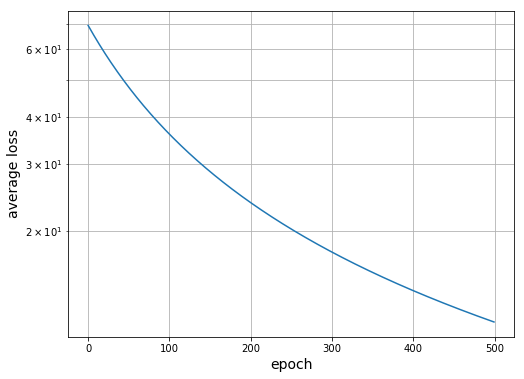

In [25]:
# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)
plt.yscale('log')

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

### Calculating Accuracy (TP +TN)

In [26]:
num_correct = 0.0
num_total = len(Xtest)

for i, (data,label) in enumerate(test_data):
    data = data.as_in_context(model_ctx)
    label = label.as_in_context(model_ctx)
    output = net(data)
    
    #Not a true probability prediction (Math Trick)
    prediction = (nd.sign(output)+1)/2
    num_correct += nd.sum(prediction==label)

print('Accuracy: %0.3f (%s/%s)' % (num_correct.asscalar()/num_total
                                   , num_correct.asscalar()
                                   , num_total)
     )

Accuracy: 1.000 (30956.0/30956)
